In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arabic_reshaper import reshape
from bidi.algorithm import get_display

In [2]:
df = pd.read_csv('data1.csv')

In [3]:
df.head()

,gender,pic,android,ios,windows,dore
0,???,1,78,0,0,1
1,??,1,39,0,0,1
2,???,0,0,0,8,0
3,???,0,0,44,0,0
4,???,0,48,0,0,0


In [4]:
df.describe()

,pic,android,ios,windows,dore
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000
mean,0.242333,29.69700,3.034667,2.082667,0.216000
std,0.428566,22.59075,11.149061,3.511117,0.411583
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,39.00000,0.000000,0.000000,0.000000
75%,0.000000,46.00000,0.000000,8.000000,0.000000
max,1.000000,94.00000,44.000000,8.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gender   3000 non-null   object
 1   pic      3000 non-null   int64 
 2   android  3000 non-null   int64 
 3   ios      3000 non-null   int64 
 4   windows  3000 non-null   int64 
 5   dore     3000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 140.8+ KB


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

gender     0
pic        0
android    0
ios        0
windows    0
dore       0
dtype: int64

In [8]:
df_gen=df['gender'].value_counts().sort_index()

In [9]:
df_gen.values

array([1114, 1886], dtype=int64)

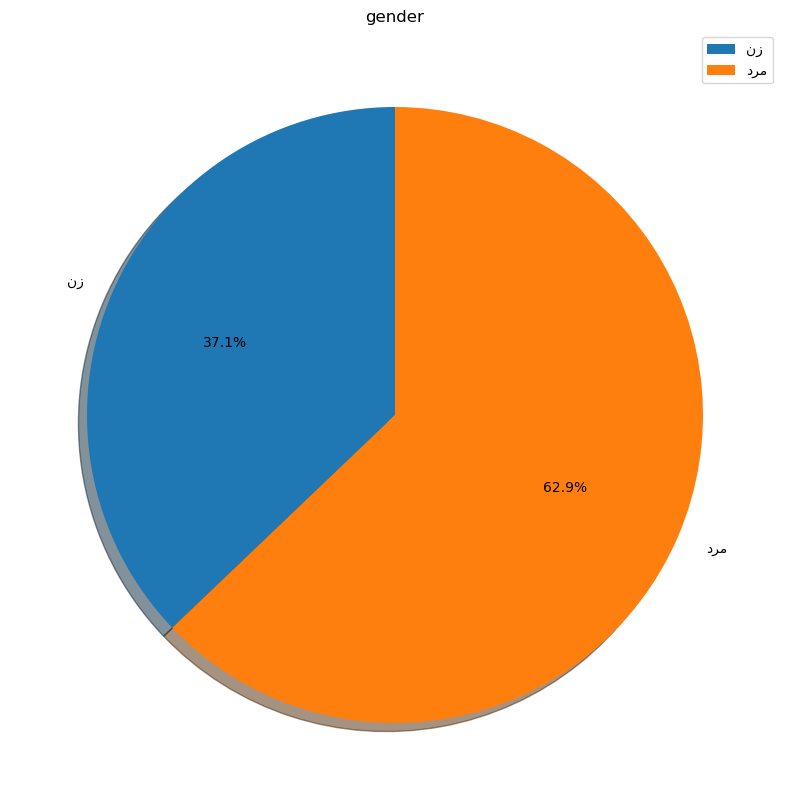

In [10]:
plt.figure(figsize=(20,10))
labels=['زن','مرد']
persian_labels = [get_display(reshape(label)) for label in labels]
df_gender=df['gender'].value_counts().sort_index()
plt.pie(df_gender.values,labels=persian_labels,startangle=90,shadow = True,autopct = '%1.1f%%')
plt.title('gender')
plt.legend()
plt.show()

In [11]:
df_ios=df['ios'].value_counts().sort_index()

In [12]:
df_ios.values

array([2793,    2,  205], dtype=int64)

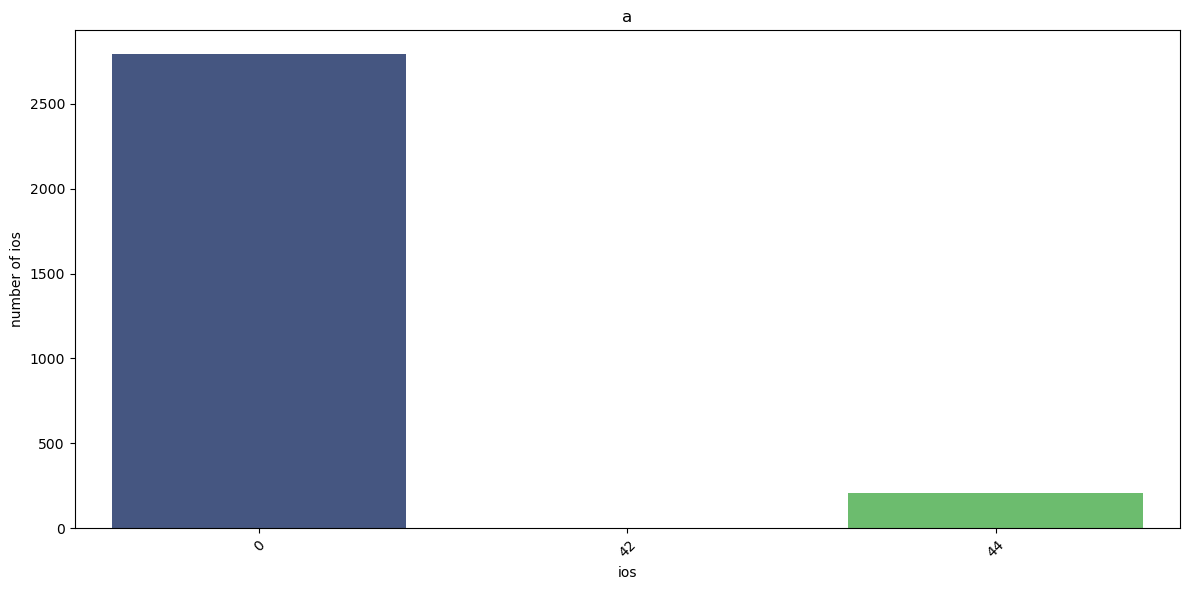

In [13]:
plt.figure(figsize=(12,6))
df_ios=df['ios'].value_counts().sort_index()
sns.barplot(x=df_ios.index,y=df_ios.values,palette='viridis')
plt.title('a')
plt.xlabel('ios')
plt.ylabel('number of ios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df_windows=df['windows'].value_counts().sort_index()

In [15]:
df_windows.values

array([2219,  781], dtype=int64)

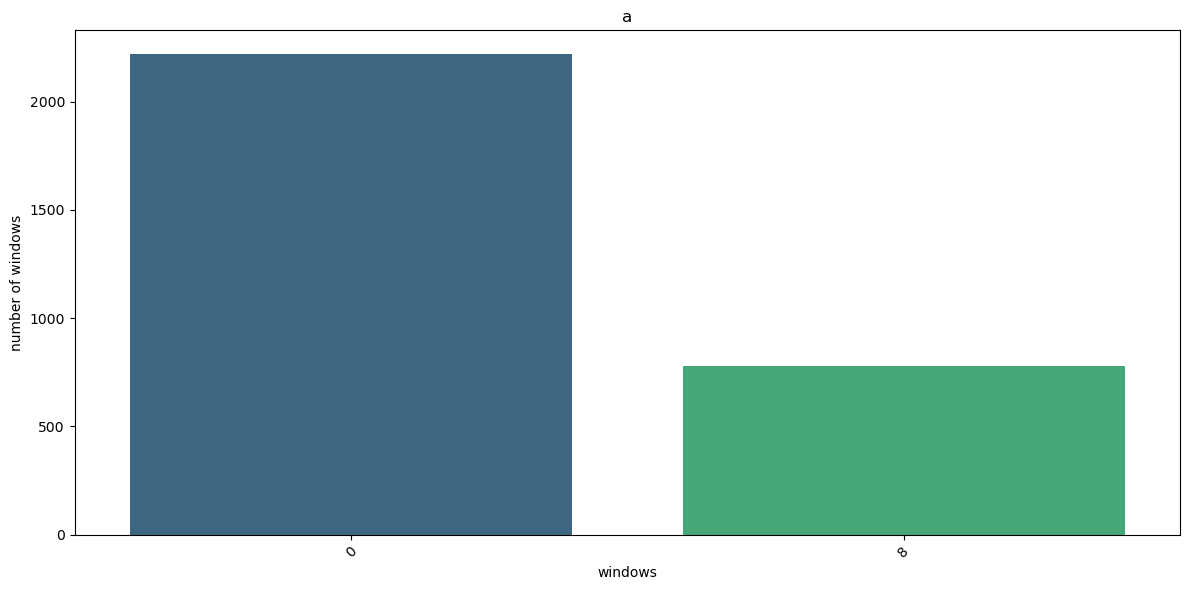

In [16]:
plt.figure(figsize=(12,6))
df_ios=df['windows'].value_counts().sort_index()
sns.barplot(x=df_windows.index,y=df_windows.values,palette='viridis')
plt.title('a')
plt.xlabel('windows')
plt.ylabel('number of windows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
df_android=df['android'].value_counts().sort_index()

In [18]:
df_android.values

array([1025,    7,  927,    1,    2,    3,    4,    3,   63,  326,  114,
        108,    9,   28,   29,    8,    6,  252,   21,    9,    1,    1,
          1,    9,   12,    3,    4,    7,    8,    4,    3,    1,    1],
      dtype=int64)

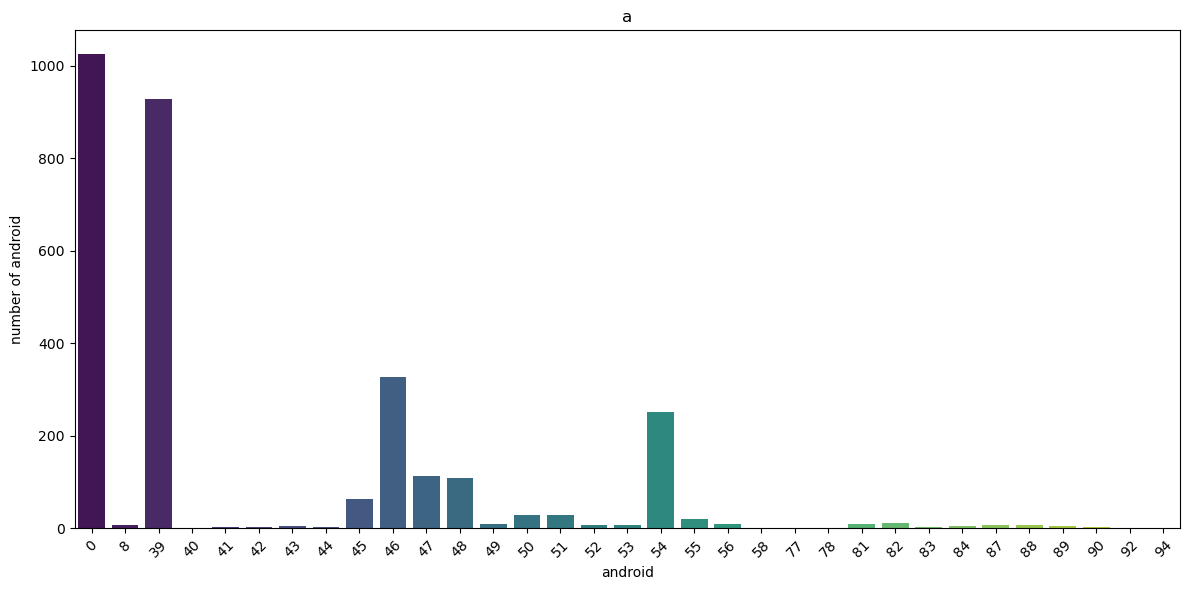

In [19]:
plt.figure(figsize=(12,6))
df_ios=df['android'].value_counts().sort_index()
sns.barplot(x=df_android.index,y=df_android.values,palette='viridis')
plt.title('a')
plt.xlabel('android')
plt.ylabel('number of android')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

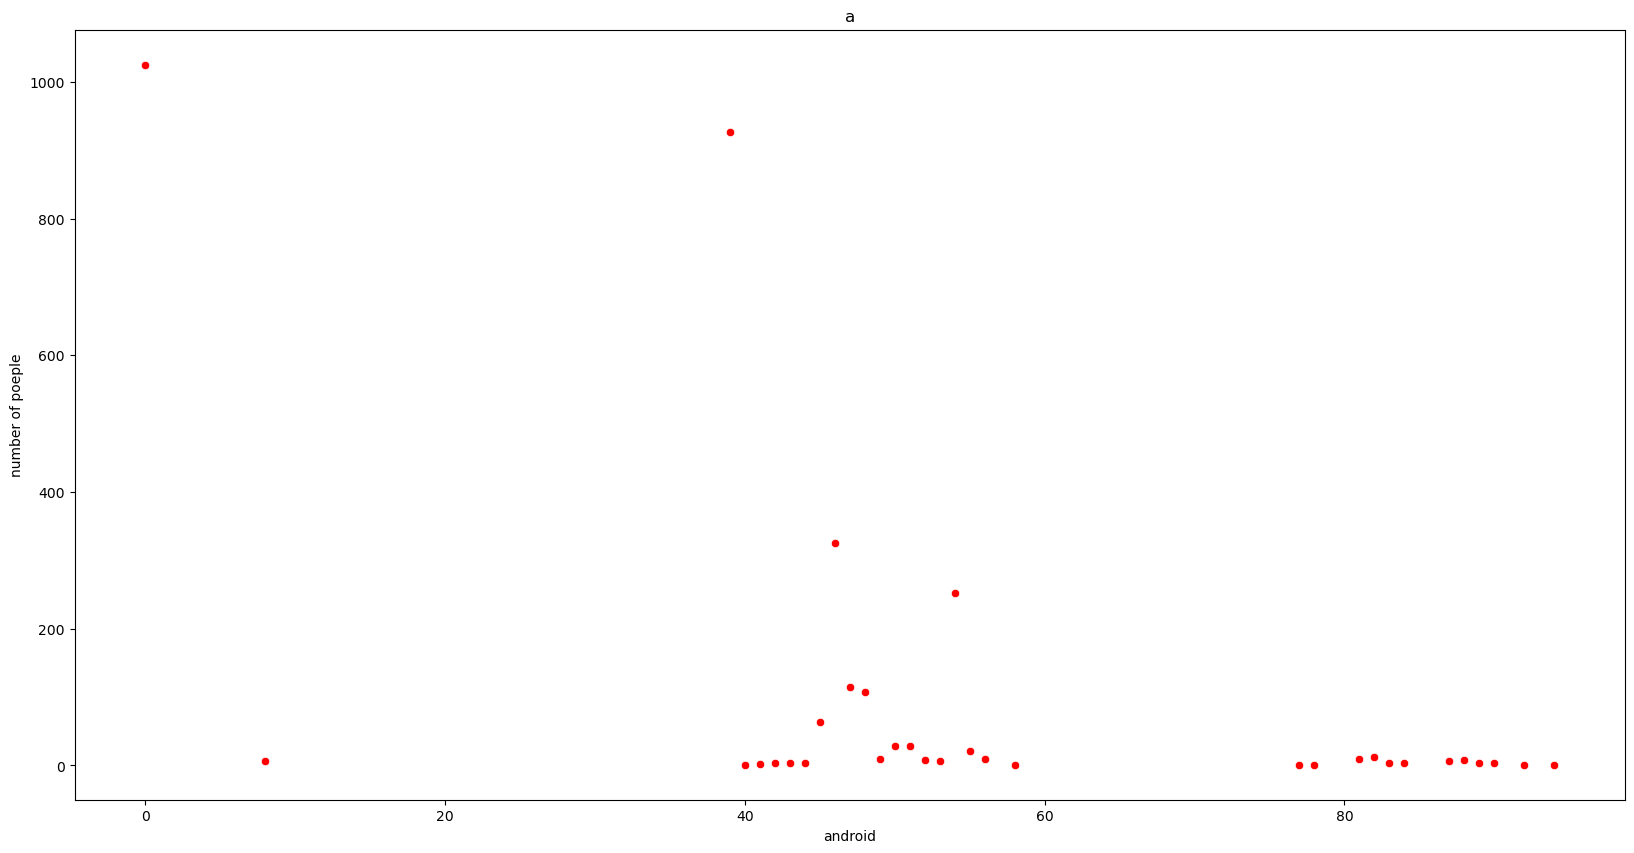

In [20]:
plt.figure(figsize=(20,10))
df_android=df['android'].value_counts().sort_index()
sns.scatterplot(x=df_android.index,y=df_android.values,marker='o',color='red')
plt.title('a')
plt.xlabel('android')
plt.ylabel('number of poeple')
plt.show()

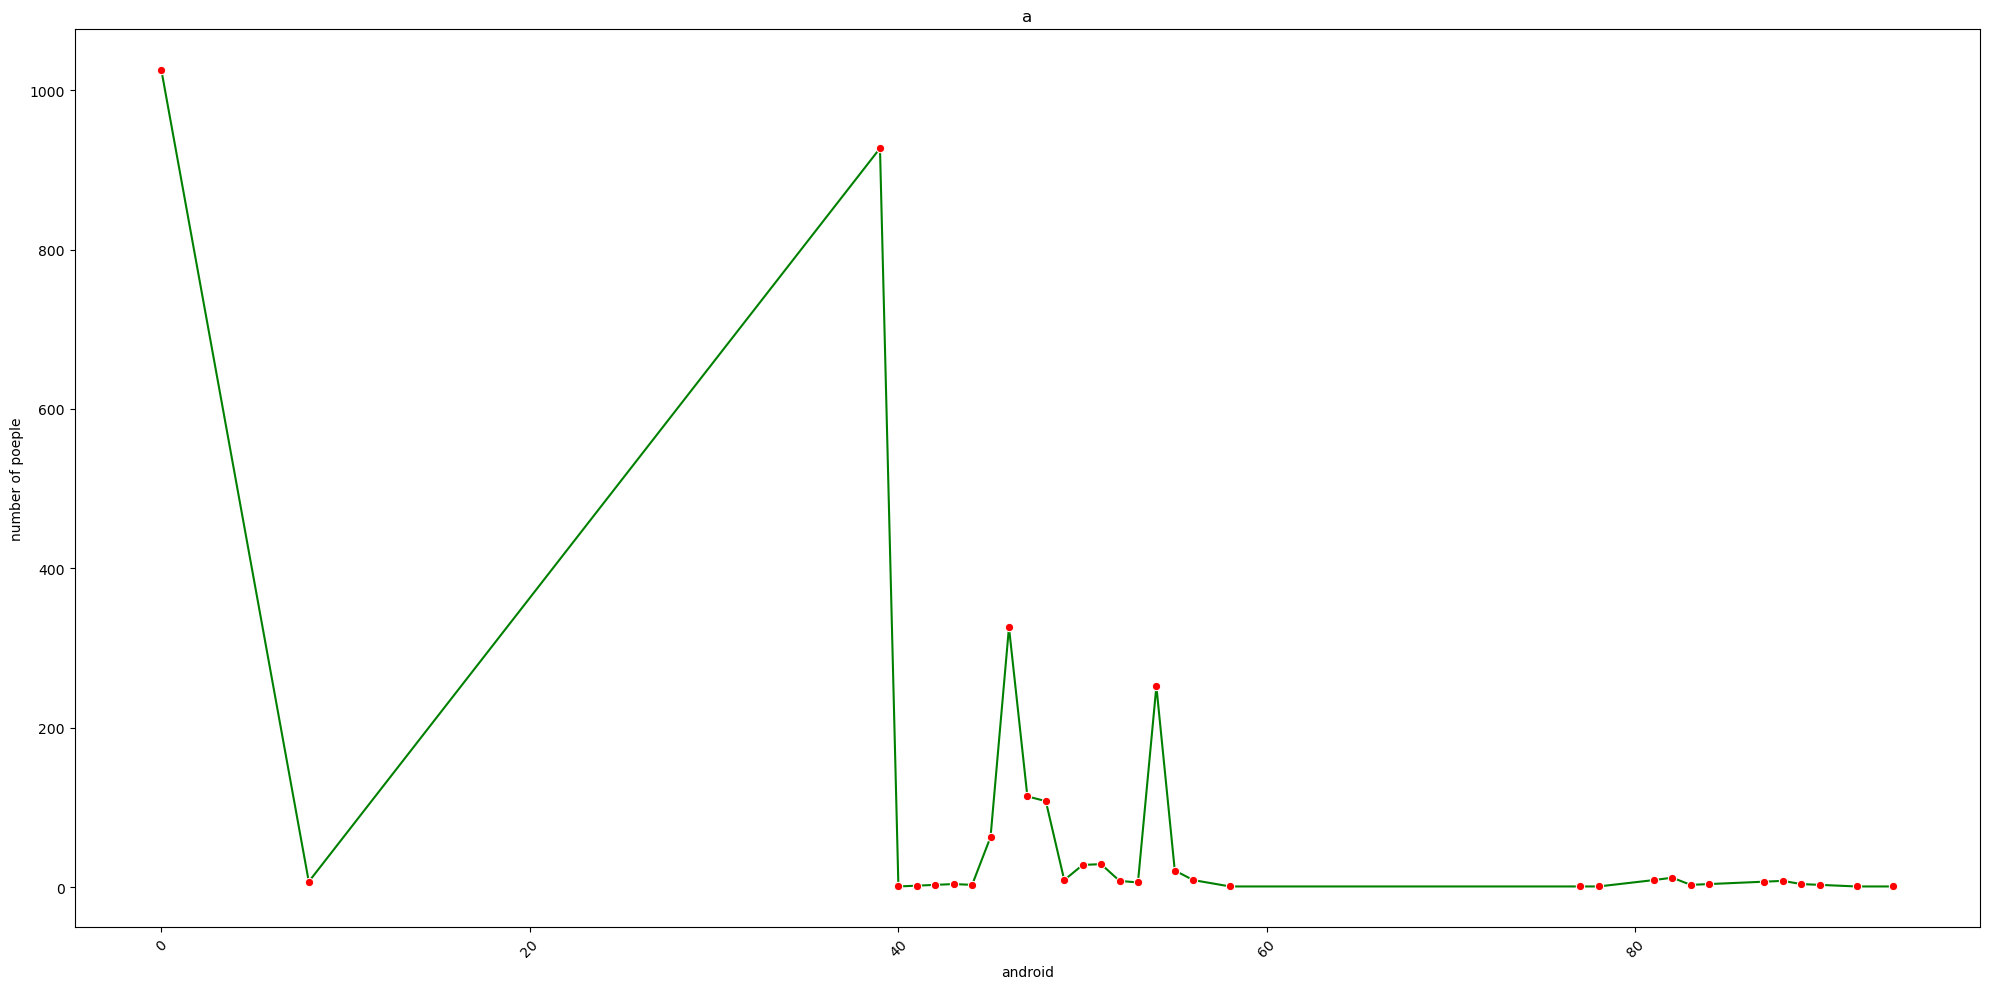

In [21]:
plt.figure(figsize=(20,10))
df_android=df['android'].value_counts().sort_index()
sns.lineplot(x=df_android.index,y=df_android.values,color='green',marker='o',mfc='red')
plt.title('a')
plt.xlabel('android')
plt.ylabel('number of poeple')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

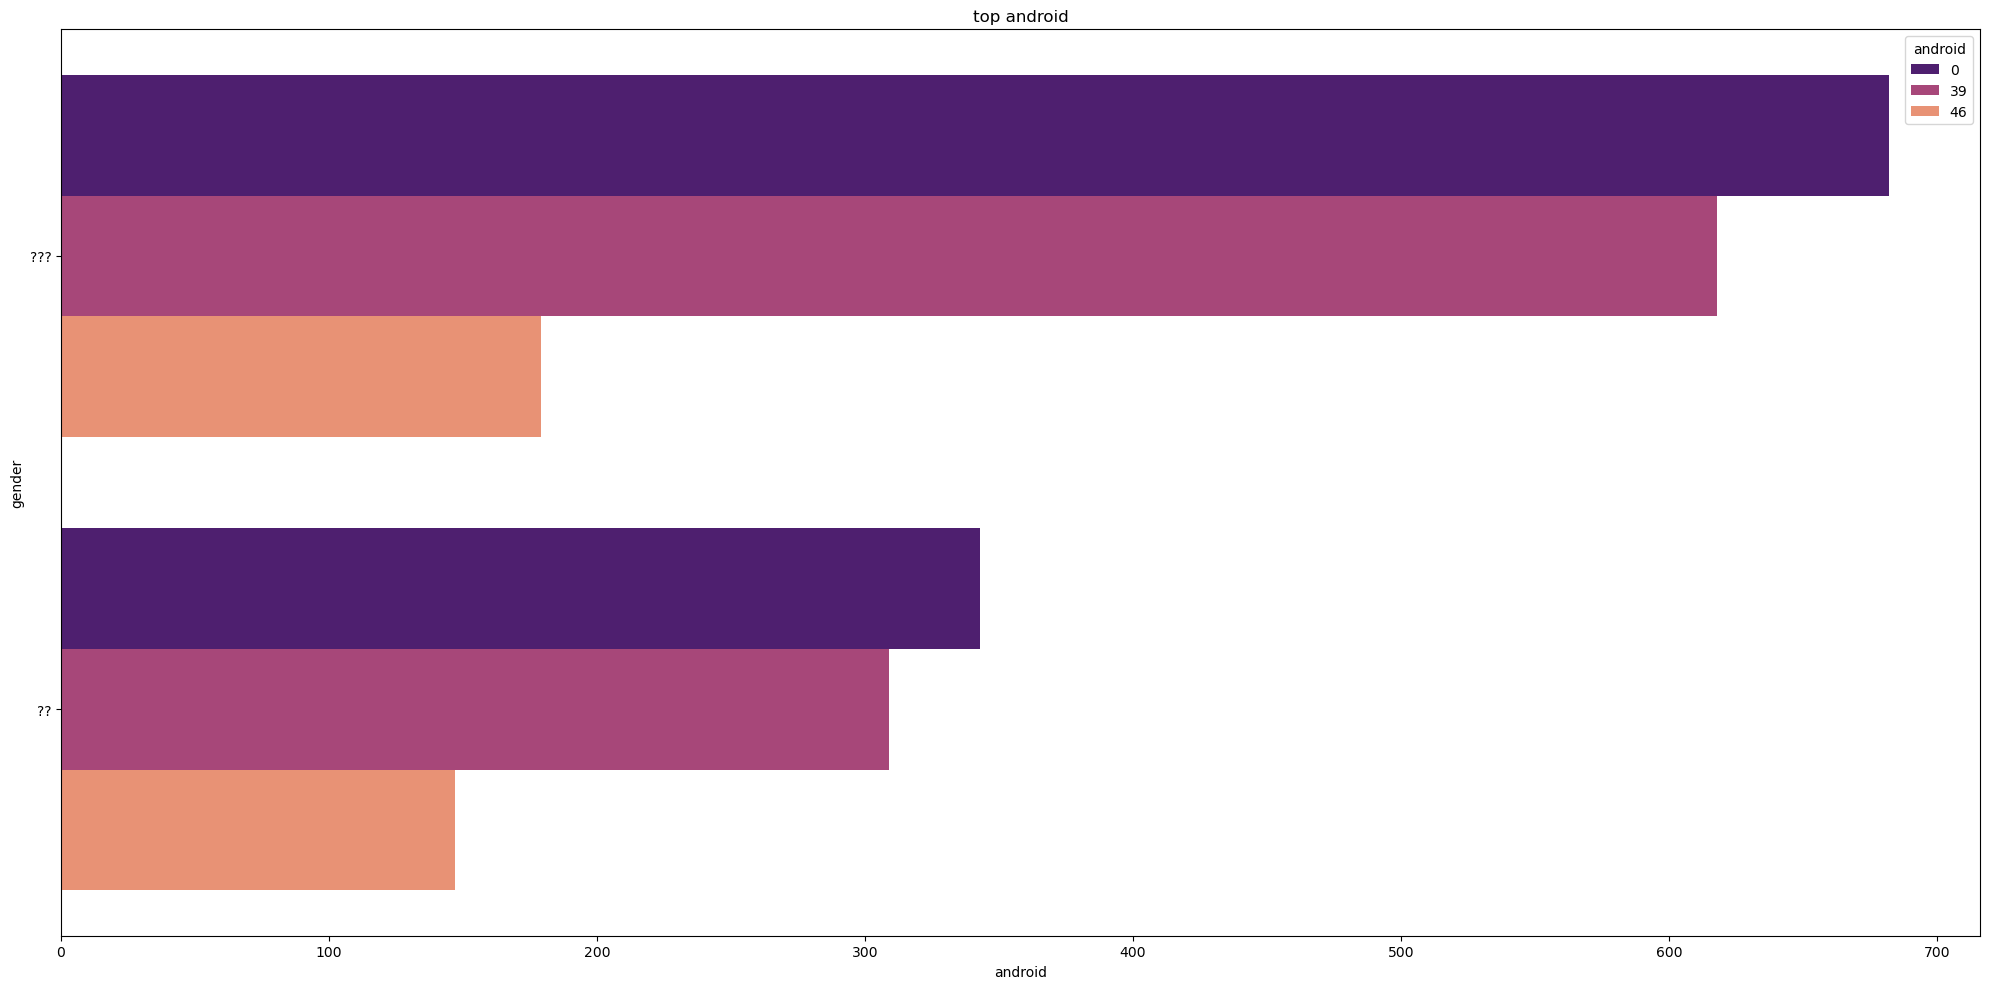

In [22]:
df_android =df['android'].value_counts()
top_android = df_android.head(3).index

top_android_data = df[df['android'].isin(top_android)]


df_android_top_gender = top_android_data.groupby(['android', 'gender']).size().sort_values(ascending=False).reset_index(name='Number of people')


top_android = df_android_top_gender.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='Number of people', y='gender', hue='android', data=top_android, palette="magma")
plt.title('top android')
plt.xlabel('android')
plt.ylabel('gender')
plt.legend(title='android')
plt.tight_layout()
plt.show()